<a href="https://colab.research.google.com/github/sanyamja1n/Bike-Sharing-Demand-Prediction/blob/main/Regression_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

# **Project Description**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. We will work with the factors on which the demand for these shared bikes depends and the factors affecting the demand for these shared bikes in the market. We will get to know:

* Which variables are significant in predicting the demand for shared bikes?
* How well those variables describe the bike demands?

 The goal of this project is also to do a linear regression model to predict the number of rented bikes in a given time frame

## <b> Problem Statement </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# Business Context
The monitoring of machine learning models enables to track and understand our model performance in production from both a data science and operational perspective. Inadequate monitoring can lead to incorrect models left unchecked in production, or subtle bugs in models that appear over time and never get caught.

##1.Importing libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##2.Mounting the drive and importing the dataset

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/Sample Data/SeoulBikeData.csv", encoding = "unicode_escape")

##  3.Data Understanding </b>

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Breakdown of Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into date time format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: Season of the year, type : str, there are only 4 season's in data, type: str

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(8760, 14)

* *This Dataset contains 8760 lines and 14 columns.*
*The Data in this dataset is of 1 year.
**In a day we have 24 hours and we have 365 days a year so we will have 365 * 24 = 8760 = number of line in the dataset.*

In [ ]:
#Checking the details of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#print the no. of unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


## 4.Preprocessing the dataset

###4.1 Checking Null Values or Duplicate Values

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

0

In [ ]:
#check for count of missing values in each column.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###4.2 Breaking Date Column

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day"
df['weekdays_weekend']= df['Day'].apply(lambda x : 'Weekend' if x=='Saturday' or x=='Sunday' else 'Weekday')
df.drop(columns=['Date','Day'],inplace=True)

* **We Extracted the Month and Day from the Date column.**
* **Then created a new column weekdays_weekend.**
* **Then dropped the Date and Day column.**

In [ ]:
df['weekdays_weekend'].value_counts()

Weekday    6216
Weekend    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

###4.3 Changing Datatype

**Hour, Month, weekdays_weekend column are shown as integer data type but actually they are category data type, so we have to change their datatypes from int to category.**

In [ ]:
#Change the int64 column into category column
cols=['Hour','Month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'weekdays_weekend'],
      dtype='object')

## 5. Exploratory Data Analysis

###Analysis of categorical variables

###5.1 In which months, the demand of rented bikes is the highest?

Text(0.5, 1.0, 'Count of Rented bikes according to Month ')

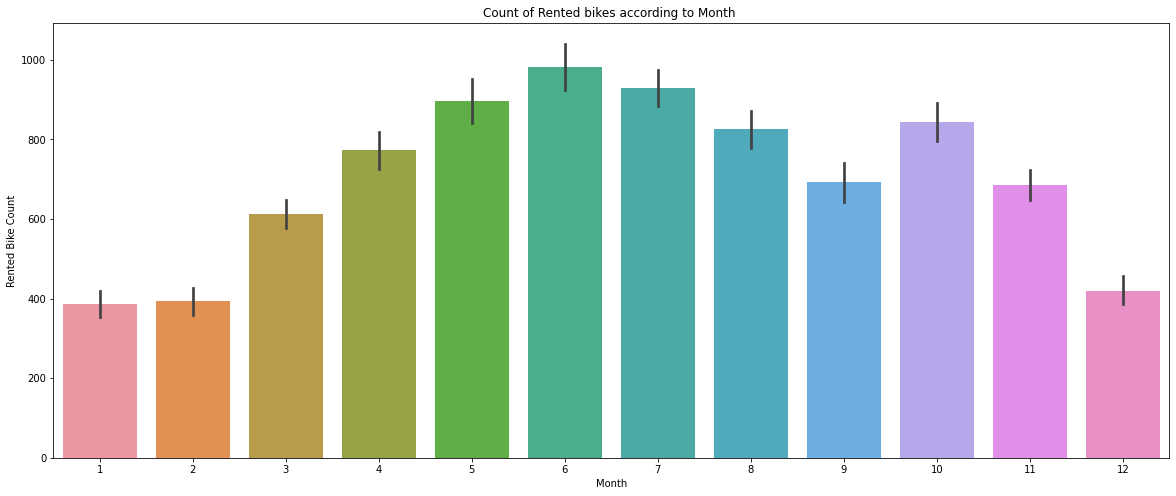

In [ ]:
# Count of Rented bikes according to Month
plt.figure(figsize=(20, 8))
sns.barplot(data=df,x='Month',y='Rented Bike Count')
plt.title('Count of Rented bikes according to Month ')

Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')

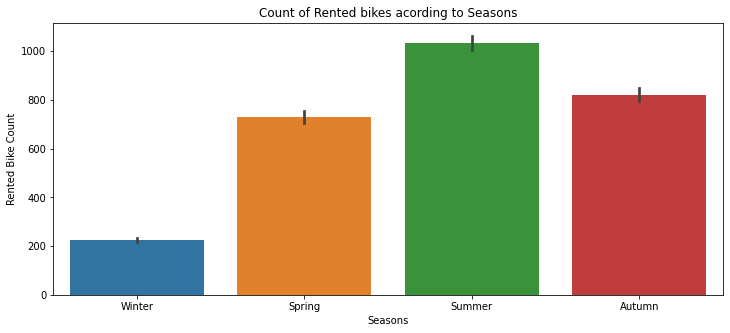

In [ ]:
#Count of Rented bikes acording to Seasons
plt.figure(figsize=(12, 5))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Seasons')

***From the above bar plots we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compared to other months.These months are part of summer season.***

###5.2 How does the bike demand vary from weekdays to weekend?

Text(0.5, 1.0, 'Count of Rented bikes acording to Weekdays and Weekend')

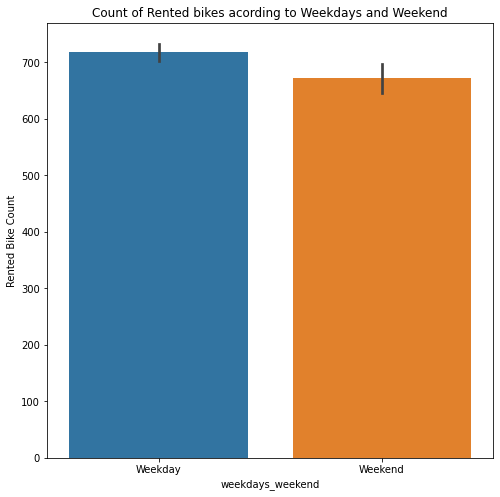

In [ ]:
#Count of Rented bikes acording to Weekdays and Weekend
plt.figure(figsize=(8, 8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Weekdays and Weekend')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend and Hour')

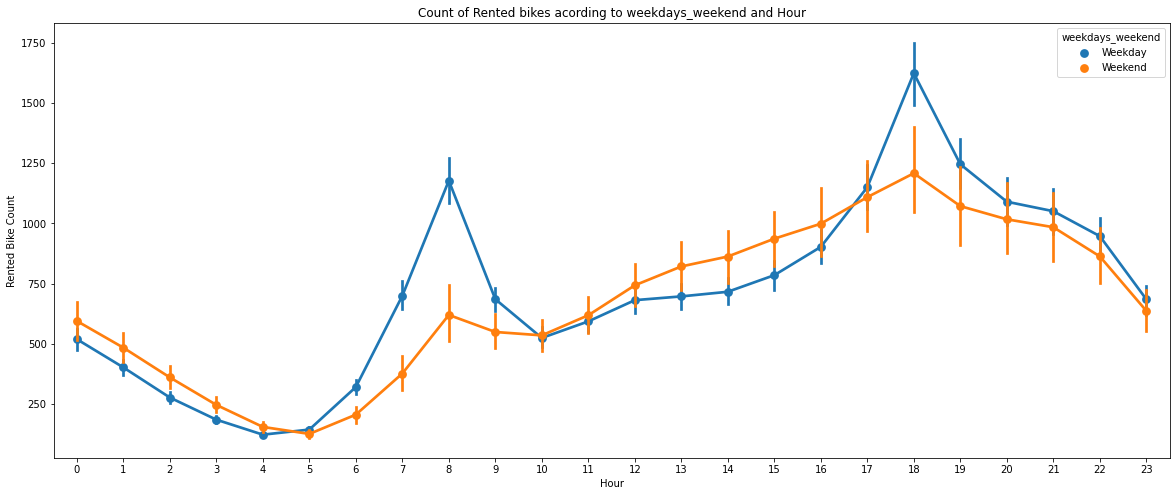

In [ ]:
#Count of Rented bikes acording to weekdays_weekend and Hour
plt.figure(figsize=(20, 8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend')
plt.title('Count of Rented bikes acording to weekdays_weekend and Hour')

* ***From the above point plot and bar plot we can say that during weekdays the demand of the bike is higher.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm**
***On weekend, the demand of rented bikes are very low specially in the morning hour but during evening, from 4 pm to 8 pm the demand slightly increases.**   

###5.3 When is the rented bike used the most during the time period of 24 hours in the day?

Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')

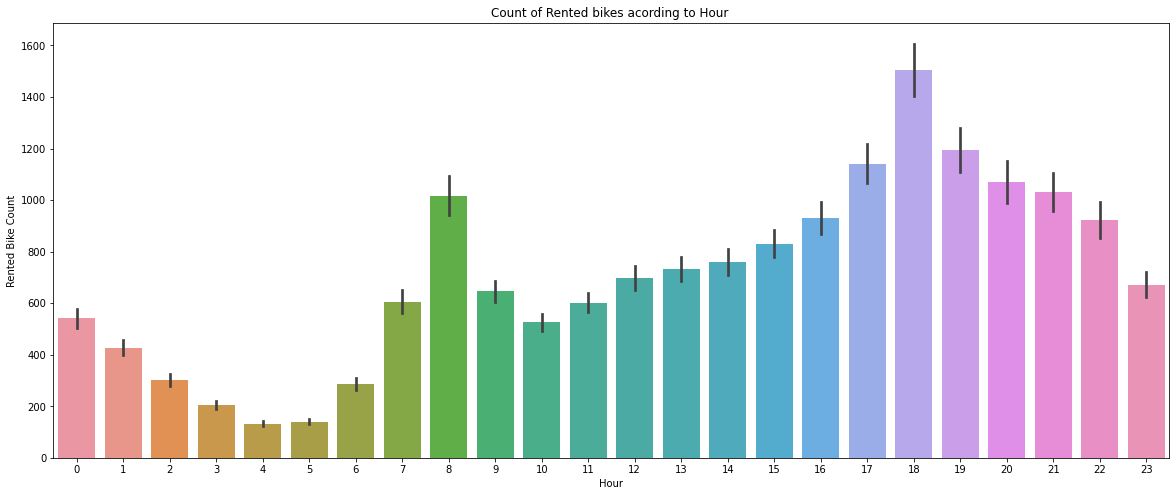

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Hour ')

 ***Most people use rented bikes while going to work from 7am to 9am and  while coming back from work from 5pm to 7pm.***   

###5.4 What is the impact of Functioning Day on Rented bike count?

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day')

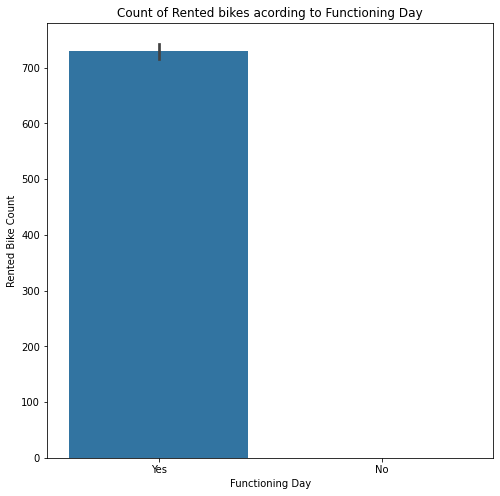

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Functioning Day')

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

***Above plot and result shows that 0 bikes were rented on non functioning day.***

###5.5 Effect of holiday on rented bike

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')

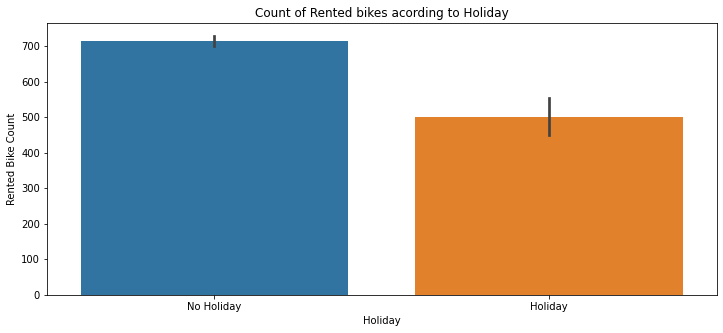

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Holiday')

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')

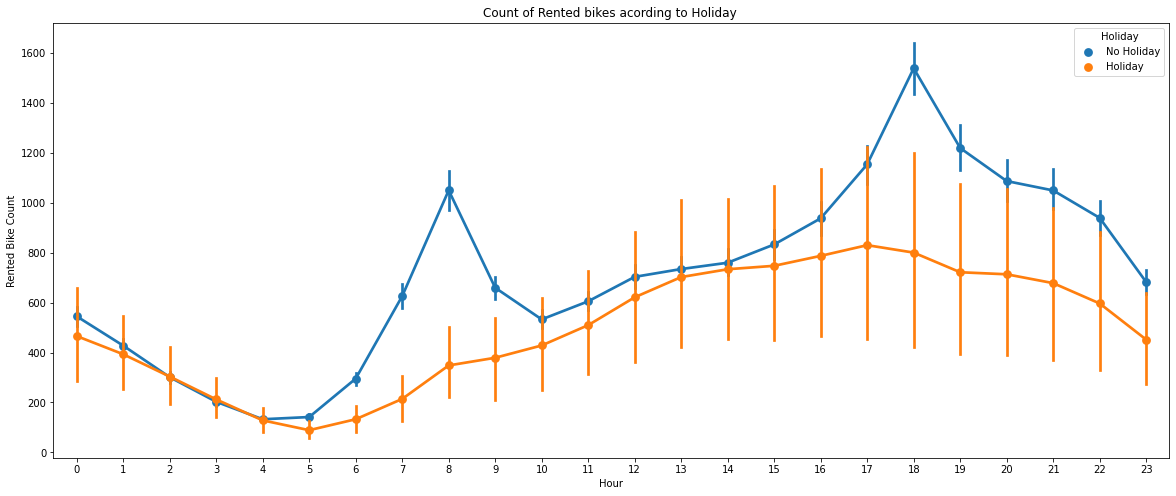

In [ ]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('Count of Rented bikes acording to Holiday ')

***During Workday people mostly rent bike around 7am to 9am and 5pm to 7pm but during holiday people tend to rent bike mostly in evening.***

###Analysis of Numerical variables

In [ ]:
#Assigning the numerical column to variable
numcol=list(df.select_dtypes(['int64','float64']).columns)
numcol

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

###5.6 Effect of different numerical features on rented bike count

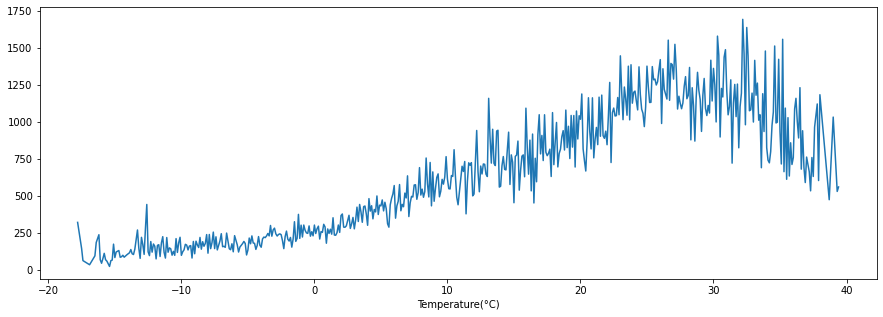

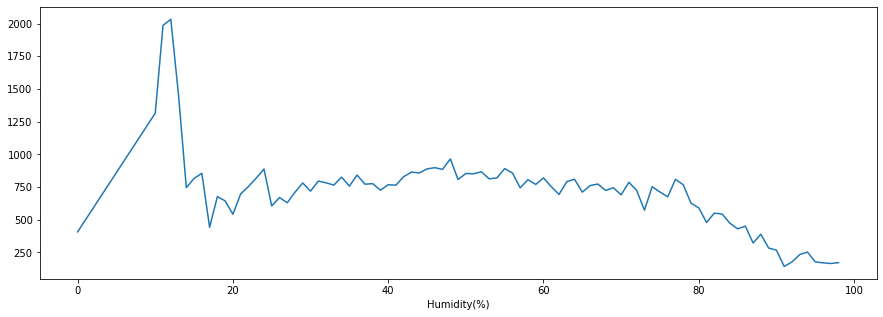

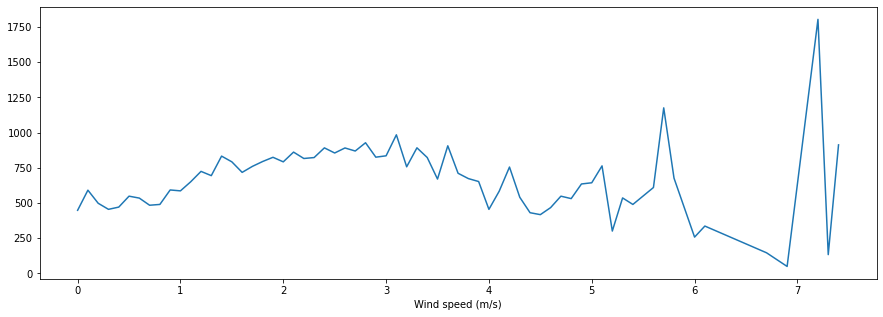

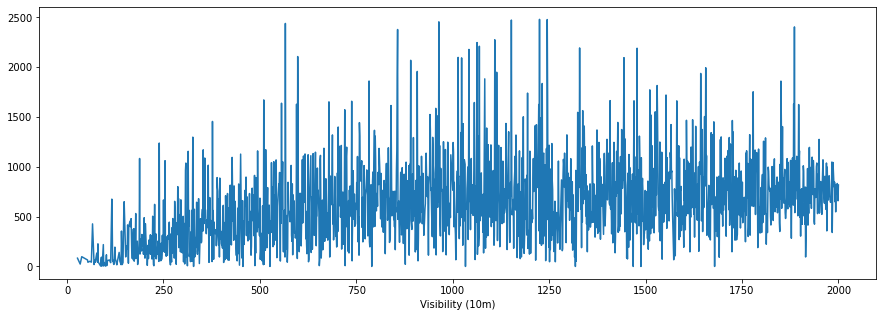

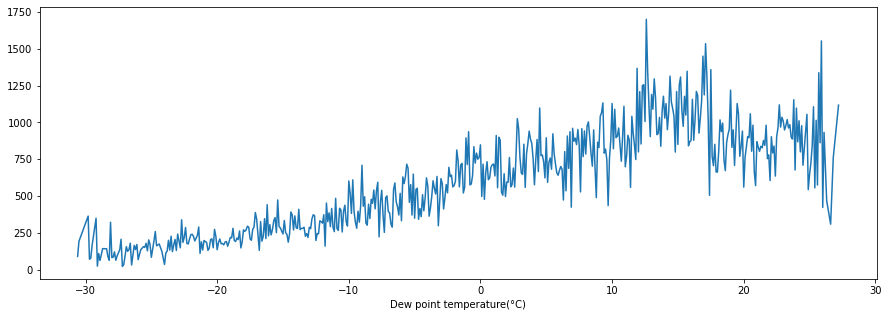

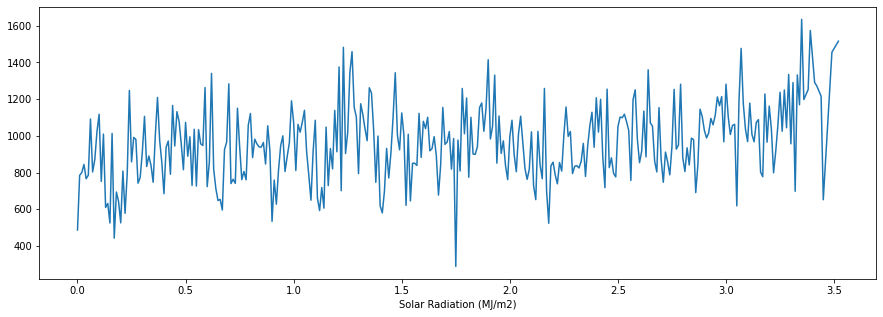

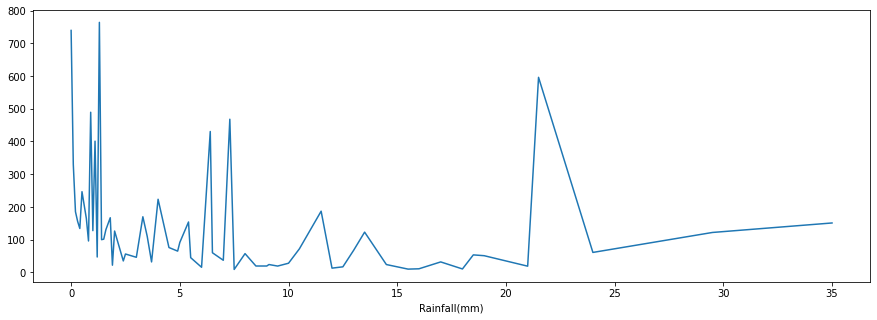

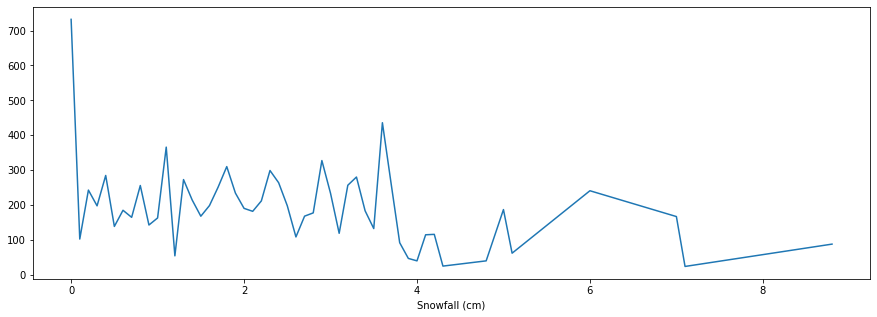

In [ ]:
for i in numcol[1:]:
  plt.figure(figsize=(15, 5))
  df.groupby(i).mean()['Rented Bike Count'].plot()
  plt.show()

***We can see from the above plot that***
* *** People love to ride bike in summer i.e., high temp.**
***The demand of rented bike is mostly uniform but as the wind speed hits 7 m/s then the demand of bike also increases which clearly depicts that people love to ride bikes when it becomes windy.*** 
***As it starts raining, the demand of rented bikes decreases but as the rainfall increases and it keeps raining, the demand of rented bikes is not decreasing*** 
***The number of rented bikes decreases as the snowfall increases more than 4 cm.**

##6. Data Normalization, Outlier detection and Removal

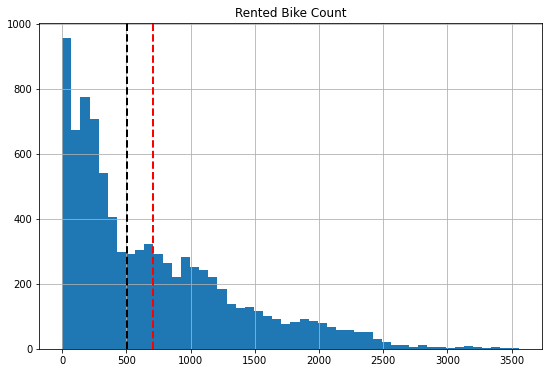

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Rented Bike Count']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)    
ax.set_title('Rented Bike Count')
plt.show()

***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we perform some operations to make it normal.***

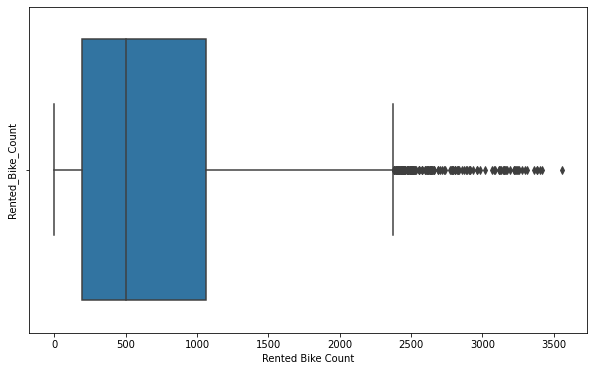

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

There are some Outliers.

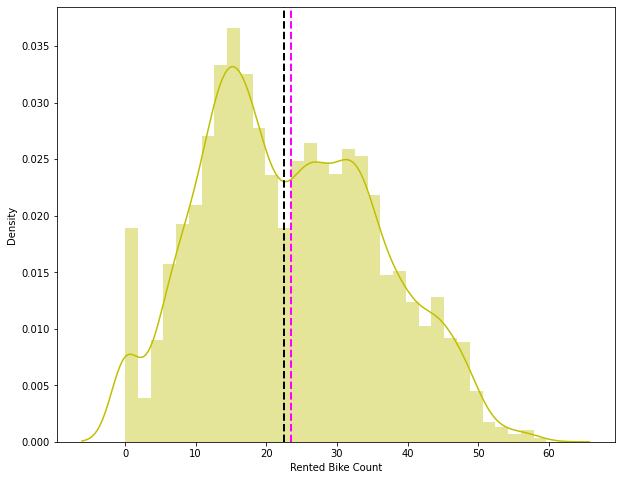

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

***Got Almost Normal Distribution.***

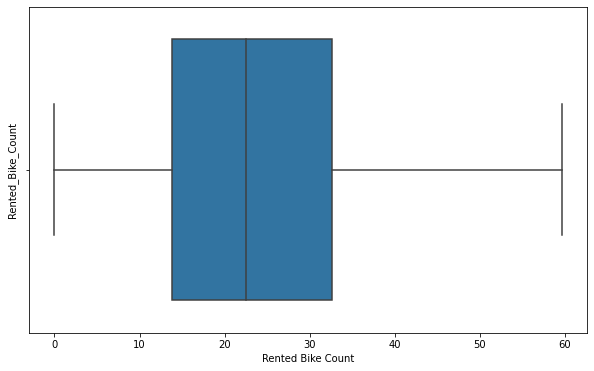

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

***After applying Square root to the Rented Bike Count column, we found that there are no outliers present.***

##7. Correlation Analysis

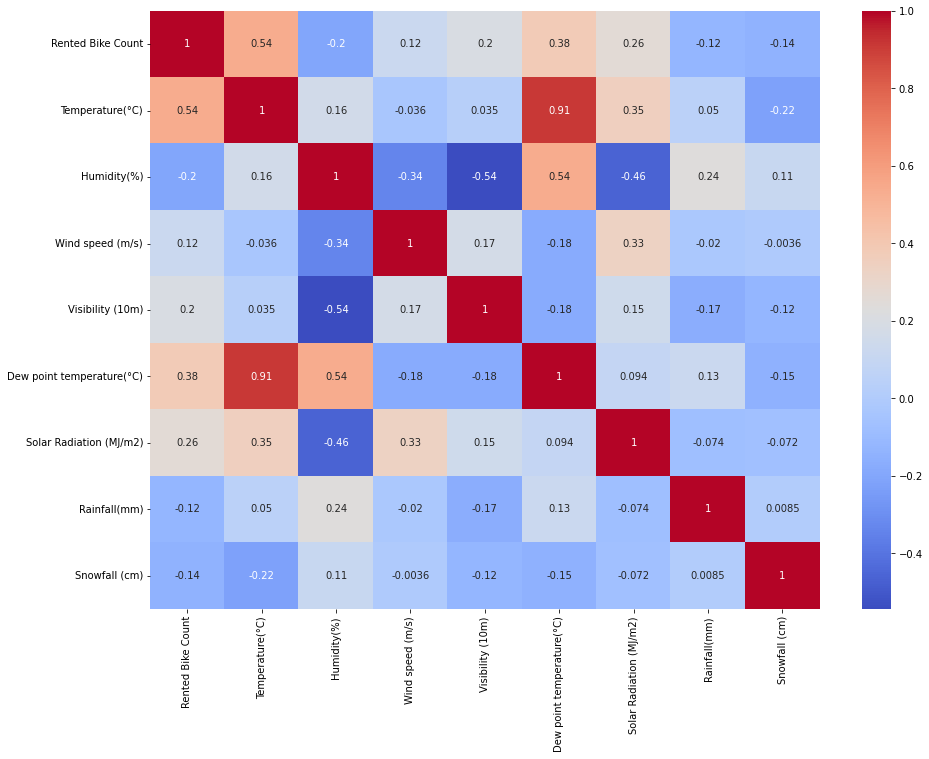

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

***From the above correlation heatmap, We can see that there is a highly positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'weekdays_weekend'],
      dtype='object')

##8. Feature Engineering

***Creating dummy variables of categorical variables by One Hot Encoding.***

In [ ]:
#Assign all catagorical features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)

***Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers.***

In [ ]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column,)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_Weekday,weekdays_weekend_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_Weekday,weekdays_weekend_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
